In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.colors as clr
%matplotlib inline

### Boilerplate

In [2]:
def plot_decision_boundary(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.scatter(x = data[:,0], y = data[:,1], c = data[:,-1], cmap=clr.ListedColormap(colors))
    plt.plot(x, y)  
    plt.show()

In [3]:
def initialize_and_run(data, func):
    weights = np.random.normal(0,1,[1,3])
    n = 0.01
    errors = []
    for i in range(15):
        errors.append(calculate_errors(weights,data))
        line = '{}*x-{}'.format(-weights[0][0]/weights[0][1],weights[0][2]/weights[0][1])
        plot_decision_boundary(line, range(-20, 20))
        weights = update_weights(data,weights,n,func)
    plot_learning_rate(errors)

In [4]:
def update_weights(data,weights,n, func):
    delta_ = func(data,weights,n)
    new_weights = weights + delta_
    return new_weights

In [5]:
def predict(weights, data):
    prediction = np.dot(weights,np.transpose(data[:,:-1]))
    prediction[prediction>0] = 1
    prediction[prediction<=0] = -1
    return prediction

In [6]:
def calculate_errors(weights, data):
    matrix = (predict(weights,data)*data[:,-1])
    return np.count_nonzero(matrix == -1)

In [7]:
def plot_learning_rate(errors):
    plt.plot(errors) 

### Generate Data

In [19]:
def generate_linear_data(trans = False):
    mean1 = [0,-5]
    mean2 = [0,2.5]
    cov = [1,0],[0,1]
    size = [100]
    data1 = np.random.multivariate_normal(mean1, cov, size)
    data2 = np.random.multivariate_normal(mean2, cov, size)
    labels1 = np.ones((100,1))
    labels2 = np.ones((100,1))*-1
    data1 = np.hstack((data1, np.ones((100,1)), labels1))
    data2 = np.hstack((data2, np.ones((100,1)),labels2))
    data = np.vstack((data1,data2))
    data = shuffle(data)
    if trans:
        data = np.transpose(data)
    return data

In [162]:
def generate_nonlinear_data(trans = False):
    mean1 = [-2.5,-2.5]
    mean2 = [0,0]
    mean3 = [2.5,2.5]
    cov = [1,0],[0,1]
    size = [100]
    data1 = np.random.multivariate_normal(mean1, cov, size)
    data2 = np.random.multivariate_normal(mean2, cov, size)
    data3 = np.random.multivariate_normal(mean3, cov, size)
    labels1 = np.ones((100,1))
    labels2 = np.ones((100,1))*-1
    labels3 = labels1
    data1 = np.hstack((data1, np.ones((100,1)), labels1))
    data2 = np.hstack((data2, np.ones((100,1)),labels2))
    data3 = np.hstack((data3, np.ones((100,1)),labels3))
    data = np.vstack((data1,data2, data3))
    data = shuffle(data)
    if trans:
        data = np.transpose(data)
    return data

In [182]:
def generate_super_nonlinear_data(trans = False):
    mean1 = [-2.5,-2.5]
    mean2 = [0,0]
    mean3 = [2.5,2.5]
    mean4 = [5,5]
    cov = [1,0],[0,1]
    size = [100]
    data1 = np.random.multivariate_normal(mean1, cov, size)
    data2 = np.random.multivariate_normal(mean2, cov, size)
    data3 = np.random.multivariate_normal(mean3, cov, size)
    data4 = np.random.multivariate_normal(mean4, cov, size)
    labels1 = np.ones((100,1))
    labels2 = np.ones((100,1))*-1
    labels3 = labels1
    labels4 = labels2
    data1 = np.hstack((data1, np.ones((100,1)), labels1))
    data2 = np.hstack((data2, np.ones((100,1)),labels2))
    data3 = np.hstack((data3, np.ones((100,1)),labels3))
    data4 = np.hstack((data4, np.ones((100,1)),labels4))
    data = np.vstack((data1,data2, data3, data4))
    data = shuffle(data)
    if trans:
        data = np.transpose(data)
    return data

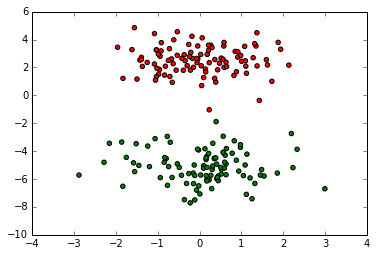

In [163]:
data = generate_two_dim_data()
colors = ['red','green']
plt.scatter(x = data[:,0], y = data[:,1], c = data[:,-1], cmap=clr.ListedColormap(colors))

### Delta rule

In [11]:
def delta(data, weights, n):
    inner_matrix = (np.dot(weights,np.transpose(data[:,:-1]))-data[:,-1])
    return n*np.dot(inner_matrix,data[:,:-1])

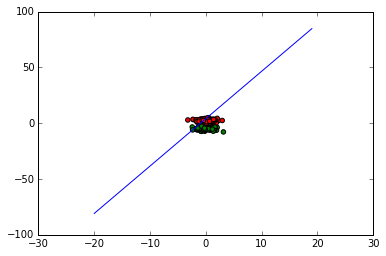

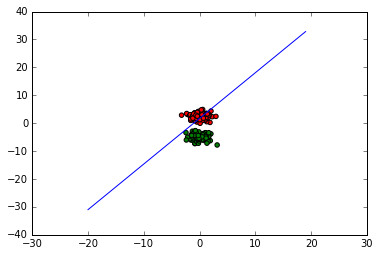

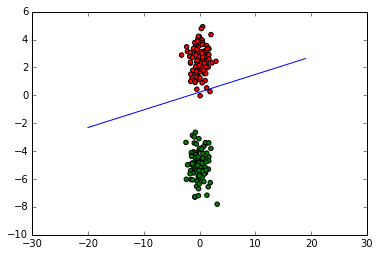

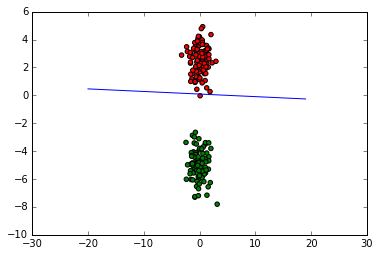

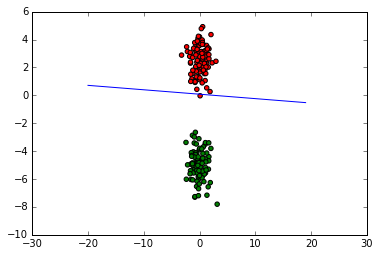

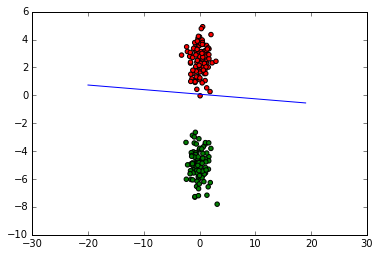

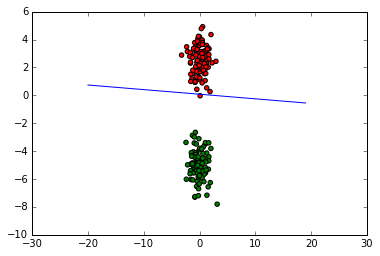

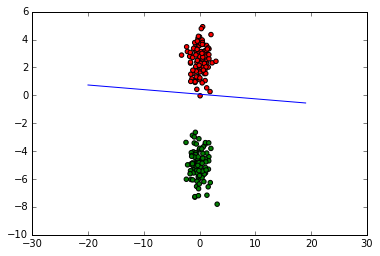

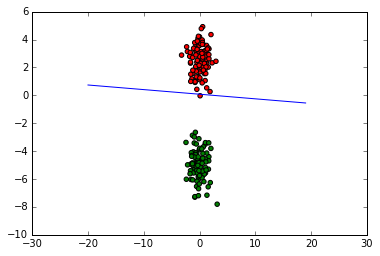

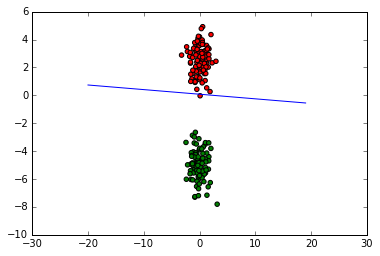

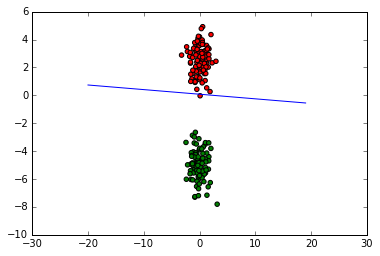

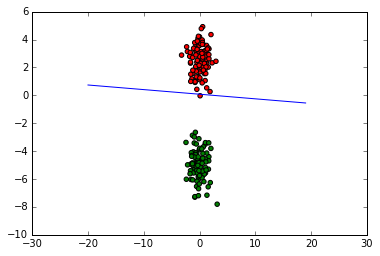

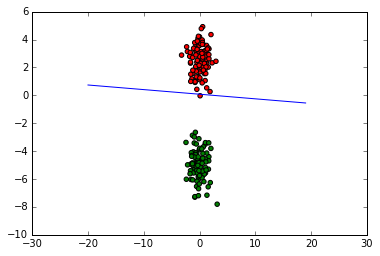

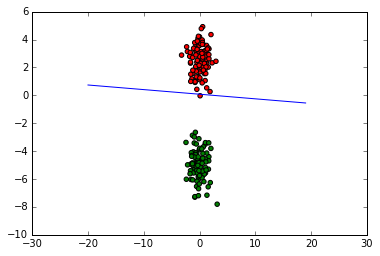

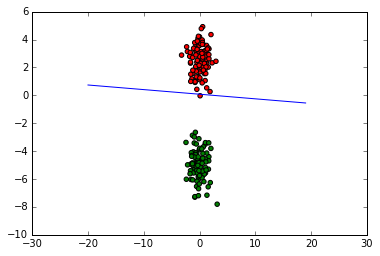

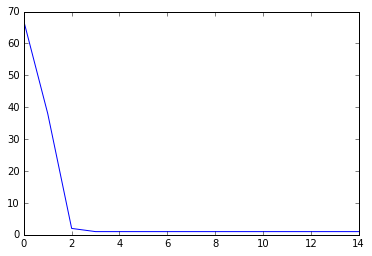

In [12]:
initialize_and_run(data,delta)

### Perceptron learning

In [13]:
def perceptron(data, weights, n):
    prediction = predict(weights,data)
    perceptron_matrix = prediction-data[:,-1]
    return np.dot(perceptron_matrix,data[:,:-1])*-n

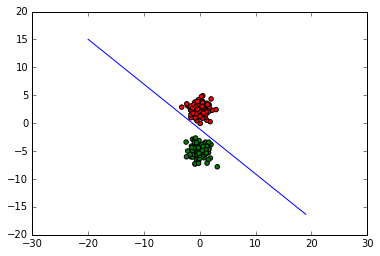

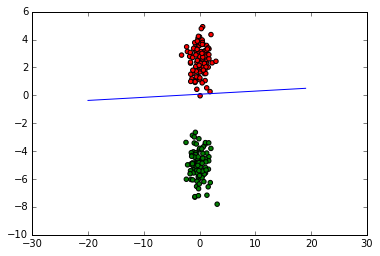

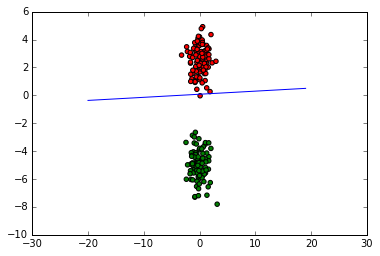

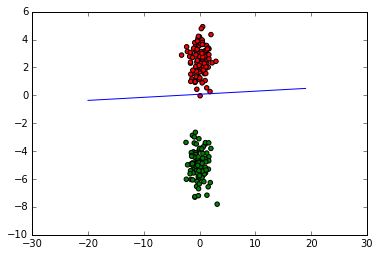

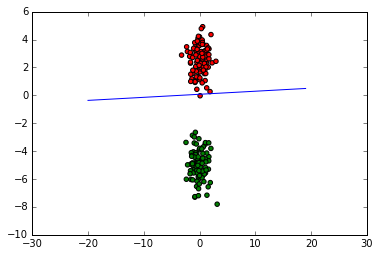

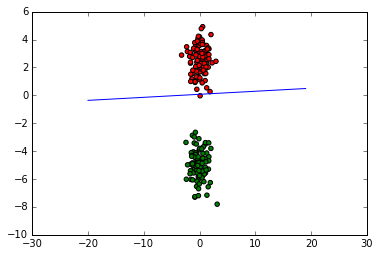

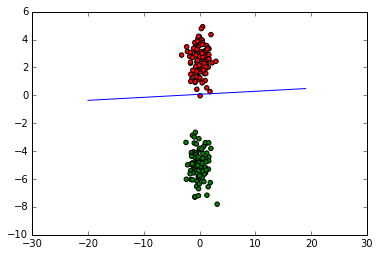

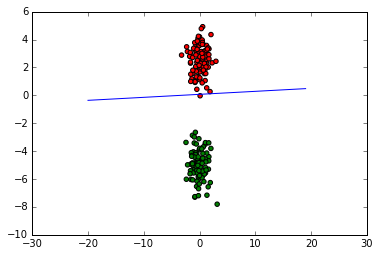

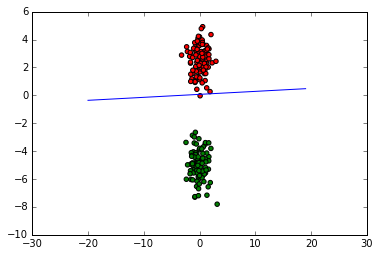

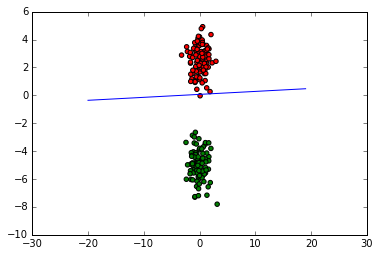

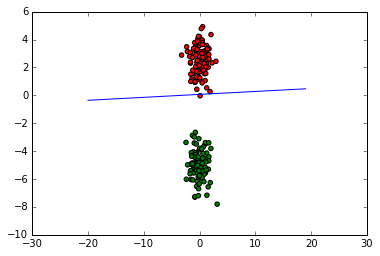

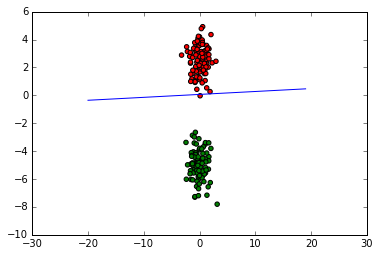

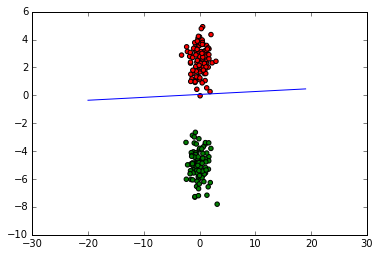

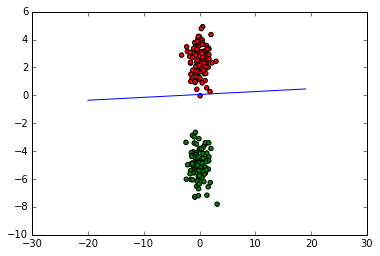

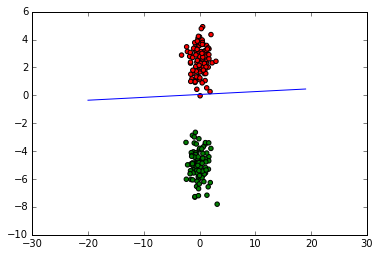

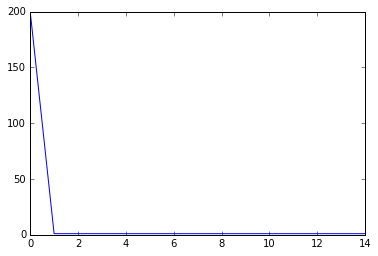

In [14]:
initialize_and_run(data, perceptron)

### Two layer network

In [156]:
class NeuralNet():
    def __init__(self, patterns, response, hidden_nodes, output_nodes):
        self.nodecount = hidden_nodes
        self.response = response
        self.patterns = patterns
        self.output_nodes = output_nodes
        self.errors = []
        
        self.layerone = np.random.normal(0,1,[hidden_nodes,np.shape(patterns)[0]])
        self.layertwo = np.random.normal(0,1,[output_nodes,hidden_nodes+1])
        self.updateone = np.zeros(np.shape(self.layerone))
        self.updatetwo = np.zeros(np.shape(self.layertwo))
                
    def transfer_function(self, value):
        f = np.vectorize(lambda x: 2/(1+np.exp(-x))-1)
        return f(value)
    
    def transfer_derivative(self, value):
        return np.divide(np.multiply(1+value,1-value),2)
        
    def forward_pass(self, patterns):
        bias = np.ones((1,np.shape(patterns)[1]))
        hin = np.dot(self.layerone, patterns)
        hout = np.vstack((self.transfer_function(hin), bias))
        
        oin = np.dot(self.layertwo, hout)
        oout = self.transfer_function(oin)
        return hout, oout
    
    def backwards_pass(self, hout, oout):   
        delta_out  = np.multiply((oout - self.response),self.transfer_derivative(oout))
        delta_hidden = np.multiply(np.dot(np.transpose(self.layertwo), delta_out),
                                   self.transfer_derivative(hout))[:-1,:]
        return delta_out, delta_hidden
    
    def update_weights(self, learning_rate, momentum):
        hout, oout = self.forward_pass(self.patterns)
        delta_out, delta_hidden = self.backwards_pass(hout, oout)
        
        self.updateone = np.multiply(momentum,self.updateone)-np.multiply((1-momentum),np.dot(delta_hidden,np.transpose(self.patterns)))
        self.updatetwo = np.multiply(momentum,self.updatetwo)-np.multiply((1-momentum),np.dot(delta_out, np.transpose(hout)))
        
        self.layerone += np.multiply(learning_rate,self.updateone)
        self.layertwo += np.multiply(learning_rate,self.updatetwo)
        
    def calculate_mse(self, patterns, response, classification = True):
        prediction = self.predict(patterns, classification)
        error = np.square(prediction - response)
        return np.average(error)
    
    def predict(self, patterns, classification = True):
        _ , prediction = self.forward_pass(patterns)
        if classification:
            prediction[prediction > 0] = 1
            prediction[prediction <= 0] = -1
        return prediction
    
    def train(self, iterations, learning_rate, momentum, classification = True):
        for iteration in range(iterations):
            self.update_weights(learning_rate, momentum)
            error = self.calculate_mse(self.patterns, self.response, classification)
            self.errors.append(error)
            
    def plot_learning_rate(self):
        plt.plot(self.errors)
        plt.show()
            
    def plot_decision_boundary(self, points = True, h = 0.1):
        x_min, x_max = self.patterns[0, :].min() - 1, self.patterns[0, :].max() + 1
        y_min, y_max = self.patterns[1, :].min() - 1, self.patterns[1, :].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
        ones = np.transpose(np.ones((np.shape(xx)[1]*np.shape(xx)[0],1)))
        grid_data = np.vstack((grid_data,ones))
        Z = self.predict(grid_data)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        if points:
            plt.scatter(self.patterns[0, :], self.patterns[1, :], c = self.response, cmap=clr.ListedColormap(['red','green']))
        plt.show()

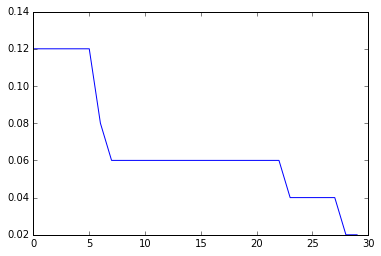

In [157]:
data = generate_linear_data(trans=True)
network = NeuralNet(data[:-1,:], data[-1,:], hidden_nodes = 30, output_nodes = 1)
network.train(30,0.001, 0.9)
network.plot_learning_rate()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


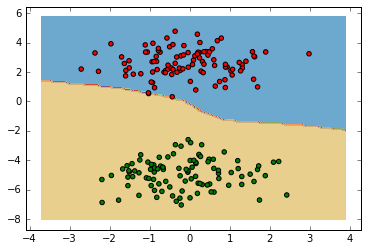

In [158]:
network.plot_decision_boundary()

### Generate 8 dimensional data

In [122]:
data = np.ones((8,8))

In [123]:
for x in range(8):
    data[x,x] = -1
data = data*-1
labels1 = np.ones((4,1))
labels2 = np.ones((4,1))*-1
labels = np.vstack((labels1,labels2))
data = np.hstack((data,np.ones((8,1)),labels))
data = shuffle(data)

In [124]:
np.shape(data)

(8, 10)

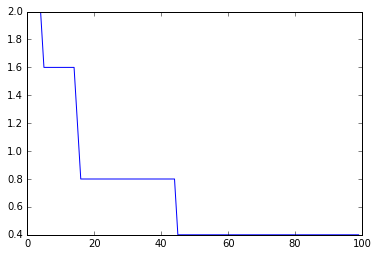

In [125]:
network = NeuralNet(data[:-1,:], data[-1,:], 15, 1)
network.train(100,0.01, 0.9)
network.plot_learning_rate()

### Plot nonlinear decision boundaries

In [164]:
data = generate_nonlinear_data(trans=True)

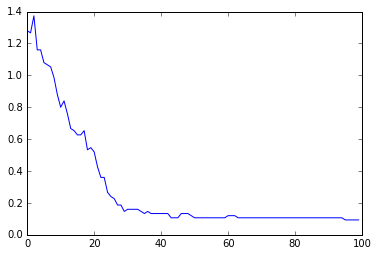

In [178]:
network = NeuralNet(data[:-1,:], data[-1,:], hidden_nodes = 100, output_nodes = 1)
network.train(100,0.01, 0.9)
network.plot_learning_rate()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


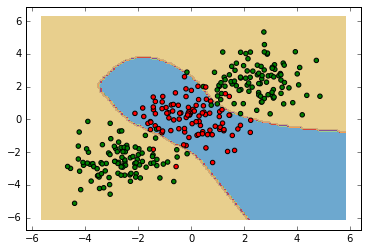

In [179]:
network.plot_decision_boundary()

In [183]:
data = generate_super_nonlinear_data(trans=True)

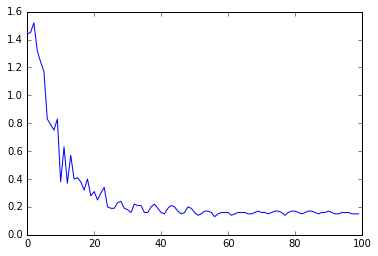

In [188]:
network = NeuralNet(data[:-1,:], data[-1,:], hidden_nodes = 30, output_nodes = 1)
network.train(100,0.01, 0.9)
network.plot_learning_rate()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


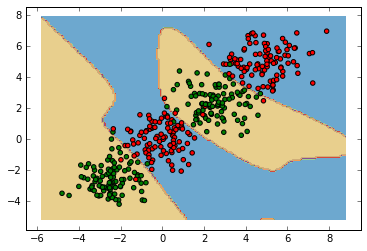

In [189]:
network.plot_decision_boundary()

### Function approximation

In [199]:
step = 0.05
xx, yy = np.meshgrid(np.arange(-0.5, 0.5, step),np.arange(-0.5, 0.5, step))
grid_data = np.c_[xx.ravel(), yy.ravel()]
ones = np.ones((np.shape(xx)[0]*np.shape(xx)[1],1))
z = (np.exp(-(grid_data[:,0]**2+grid_data[:,1]**2)/10)-0.5).reshape(len(ones),1)
grid_data = np.transpose(np.hstack((grid_data,ones,z)))


In [242]:
network = NeuralNet(grid_data[:-1,:], grid_data[-1,:], 20, 1)
network.train(50,0.001, 0.9)

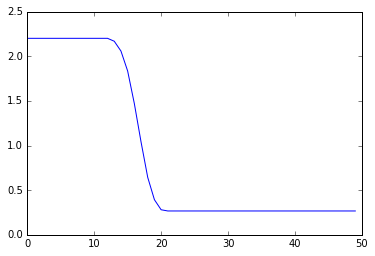

In [243]:
network.plot_learning_rate()

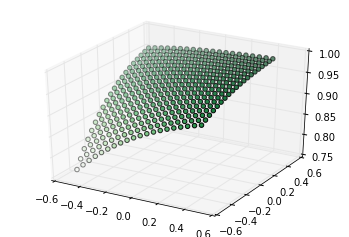

In [244]:
result = network.predict(grid_data[:-1,:], classification=False)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx, yy, result, c=result, cmap='Greens');

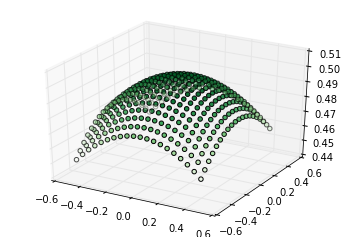

In [207]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx, yy, grid_data[-1,:], c=grid_data[-1,:], cmap='Greens');

# ASSIGNMENT 2